# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# Reading in Data

In [2]:
MNIST = datasets.load_digits()

# Setting up Data

In [3]:
x = MNIST.data
y = MNIST.target

In [4]:
print (x.shape)
print (y.shape)

(1797, 64)
(1797,)


In [5]:
def plot_digit(data):
    fig, axes = plt.subplots(1, 10, figsize = (10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation = 'nearest',
                  clim=(0, 16))

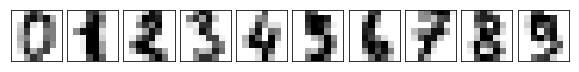

In [6]:
plot_digit(x)

# Use PCA to reduce dimensionality

### Plot the first two components. Do you notice any trends? What is this plot showing us?

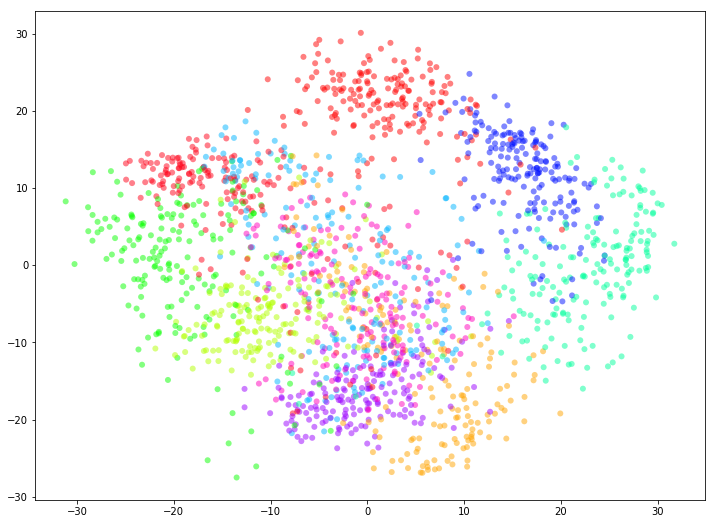

In [7]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(x)
f, ax = plt.subplots(figsize = (12,9))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=y, cmap='hsv', edgecolor='none', alpha=0.5)

The plot is showing us different clusters found within the dataset.

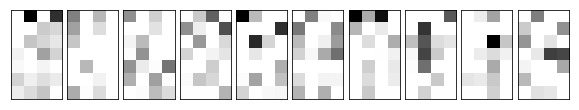

In [8]:
pca = PCA(n_components = 28)
x_pca = pca.fit_transform(x)

def plot_digit2(data):
    fig, axes = plt.subplots(1, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(7, 4),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digit2(x_pca)

### Why would you use PCA? What is it doing? And what are the drawbacks?

PCA reduces dimensionality.  PCA is reducing the dimensions by maximizing variance.  When PCA is used less of the data is explained (less variance with fewer dimensions).  

Text(0.5, 1.0, 'Explained Variance by Components Preserved')

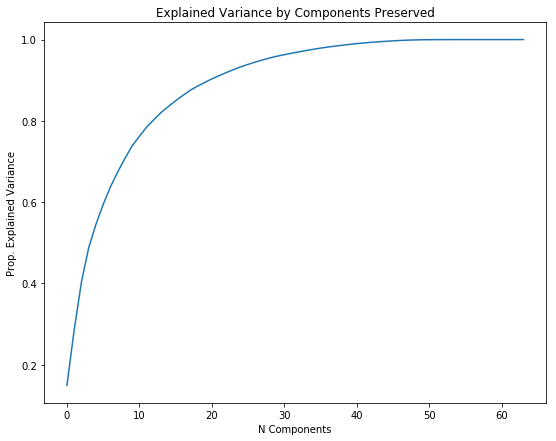

In [9]:
pca = PCA()
x_pca = pca.fit_transform(x)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)

f, ax = plt.subplots(figsize=(9,7))
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.ylabel('Prop. Explained Variance')
plt.xlabel('N Components')
plt.title('Explained Variance by Components Preserved')

### How many components did you use? Why?

In [10]:
index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

28
0.9547965245651596


# Use t-SNE to plot the first two components (you should probably random sample around 10000 points)

In [11]:
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)

rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.639319
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.724899
[t-SNE] KL divergence after 1000 iterations: 0.686831


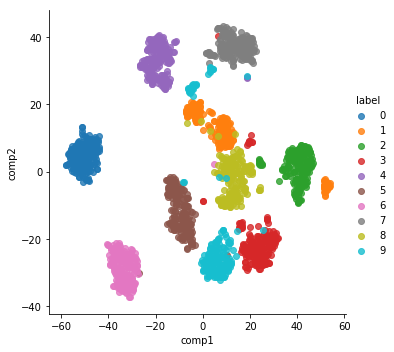

In [12]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

### How does this plot differ from your PCA plot?

Different distances.  Better for visulization than PCA.  

### How robust is it to changes in perplexity?

In [13]:
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)

rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.002s...
[t-SNE] Computed neighbors for 1797 samples in 0.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 5.706740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.302170
[t-SNE] KL divergence after 1000 iterations: 0.924802


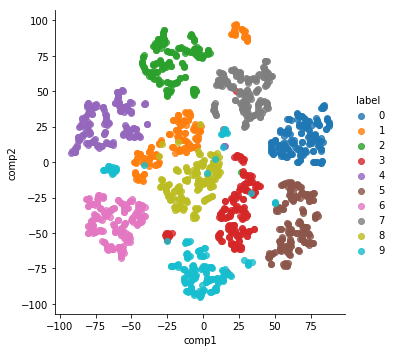

In [14]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Pretty robust

### How robust is it to different learning rate and number of iterations?

In [15]:
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)

rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250, learning_rate=20)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.319s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.639317
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.683445
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


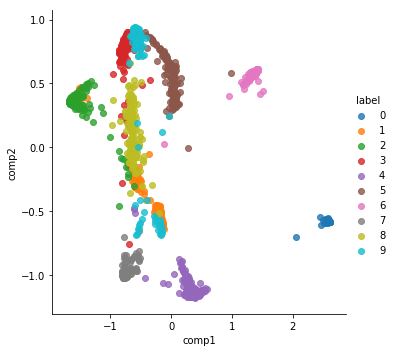

In [16]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Not very robust

# Perform k-means clustering:

In [17]:
kmeans_model = KMeans(n_clusters = 10, n_init = 50, n_jobs = -1)
kmeans_model.fit(x)
labels = kmeans_model.labels_
silhouette_score(x, labels, metric='euclidean')

0.18241138960992534

### How did you choose k?

There are ten unique digits

### Visualize your clusters using t-sne

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.007s...
[t-SNE] Computed neighbors for 1797 samples in 0.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121140
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.752640
[t-SNE] KL divergence after 1000 iterations: 0.760855


Text(0.5, 1.0, 'K-Means Clustering')

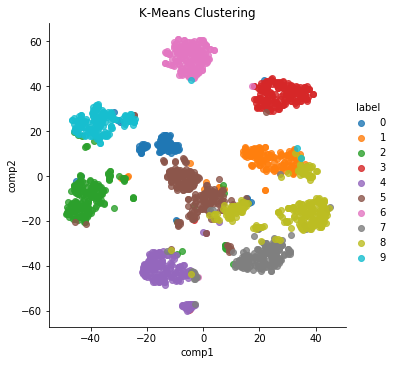

In [18]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(x[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')

## Perform hierarchical clustering:

### Plot your dendrogram

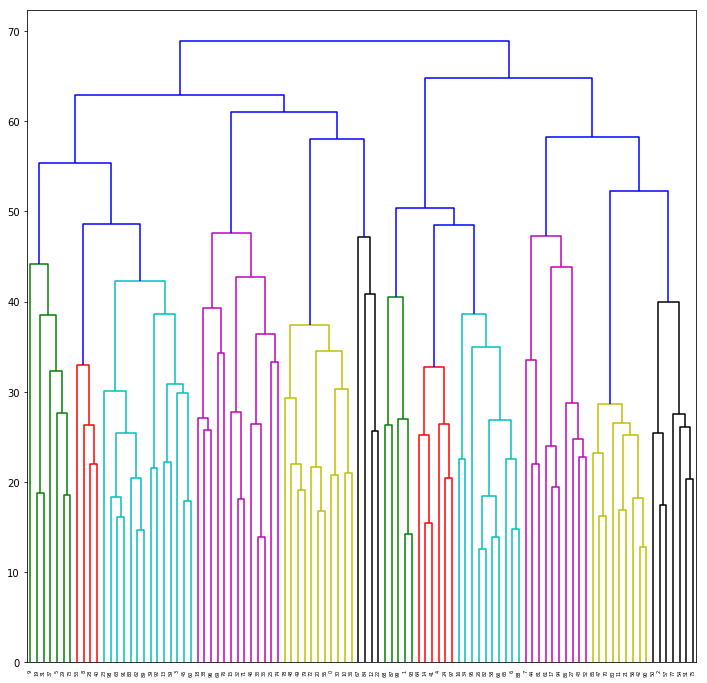

In [19]:
x_clusters = x[:100]

Z = linkage(x_clusters, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

###  How many clusters seem reasonable based off your graph?

8-10 clusters

###  How does your dendrogram change with different linkage methods?

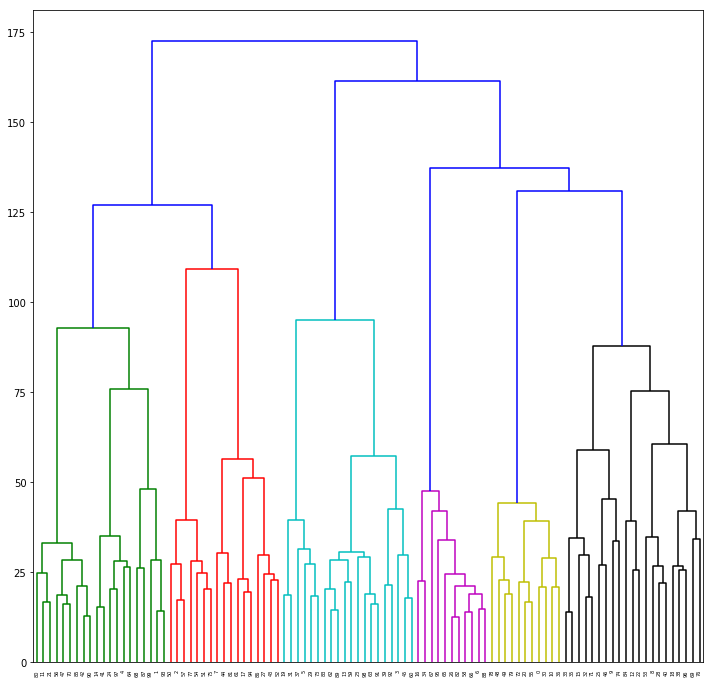

In [20]:
x_clusters = x[:100]

Z = linkage(x_clusters, 'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

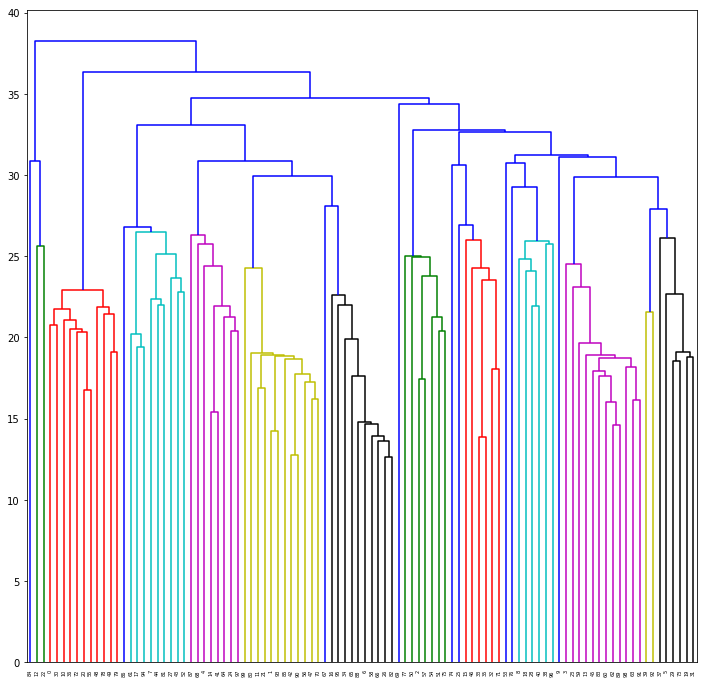

In [21]:
x_clusters = x[:100]

Z = linkage(x_clusters, 'single')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)